## Setup and Data Loading

In [9]:
# Import utilities and libraries
import sys
import os
import importlib

# Add analysis directory to Python path (notebook runs from project root)
analysis_dir = os.path.join(os.getcwd(), 'analysis')
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

# Import and reload utils to get latest changes
import utils
importlib.reload(utils)
from utils import *

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
setup_plotting_style()

print("Libraries and utilities imported and reloaded successfully!")

Libraries and utilities imported and reloaded successfully!


## Configuration

Configure the analysis parameters and algorithm folder to analyze.

In [10]:
# Configuration: Set the algorithm folder name here
# Change this to analyze different algorithm results (e.g., "greedy", "genetic", "simulated_annealing", etc.)
ALGORITHM_FOLDER = "regret"

# Instances to analyze (can be modified as needed)
INSTANCES = ['TSPA', 'TSPB']

# Export settings
EXPORT_ENABLED = False
EXPORT_PLOTS = False
PLOT_FORMAT = 'png'  # Options: 'png', 'pdf', 'svg'
PLOT_DPI = 300

print(f"Configuration set:")
print(f"  Algorithm folder: {ALGORITHM_FOLDER}")
print(f"  Instances: {INSTANCES}")
print(f"  Export enabled: {EXPORT_ENABLED}")
print(f"  Plot format: {PLOT_FORMAT} (DPI: {PLOT_DPI})")

Configuration set:
  Algorithm folder: regret
  Instances: ['TSPA', 'TSPB']
  Export enabled: False
  Plot format: png (DPI: 300)


In [11]:
# Load algorithm data using utility functions
algorithm_data = load_all_algorithm_results(ALGORITHM_FOLDER, INSTANCES)

if algorithm_data:
    print(f"\nSuccessfully loaded data for {len(algorithm_data)} instances")
    for instance_name, data in algorithm_data.items():
        df = data['df']
        print(f"{instance_name}: {len(df)} results")
else:
    print("No data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")
    print(f"Available algorithm folders: {get_available_algorithm_folders()}")
    for folder in get_available_algorithm_folders():
        instances = get_available_instances(folder)
        print(f"  {folder}: {instances}")

Loaded 800 results for TSPA from regret folder
Algorithms: ['GreedyCycle2Regret_w0_1', 'GreedyCycle2Regret_w1_1', 'NearestNeighborAny2Regret_w0_1', 'NearestNeighborAny2Regret_w1_1']
Loaded 800 results for TSPB from regret folder
Algorithms: ['GreedyCycle2Regret_w0_1', 'GreedyCycle2Regret_w1_1', 'NearestNeighborAny2Regret_w0_1', 'NearestNeighborAny2Regret_w1_1']

Successfully loaded data for 2 instances
TSPA: 800 results
TSPB: 800 results


## Visualization Data Exporter

This section provides functionality to export visualization data and results to files for use in other analysis tools.

In [12]:
# Create exporter instance using the utility class
exporter = VisualizationExporter(ALGORITHM_FOLDER)
print(f"Visualization exporter created for algorithm folder: {ALGORITHM_FOLDER}")
print(f"Output directory: {exporter.output_dir}")

Visualization exporter created for algorithm folder: regret
Output directory: results\regret


## Computational Experiment Results

## Export Results

Export the loaded algorithm results to various formats for further analysis and archival.

In [13]:
# Export all results using the visualization exporter
if algorithm_data and EXPORT_ENABLED:
    print("Exporting algorithm results...")
    
    # Export best solutions data
    exporter.export_best_solutions_data(algorithm_data, filename_suffix="_analysis")
    
    # Export statistical summaries
    exporter.export_statistics_summary(algorithm_data, filename_suffix="_analysis")
    
    # Export visualization plots (if enabled)
    if EXPORT_PLOTS:
        exporter.export_visualization_plots(algorithm_data, filename_suffix="_analysis", 
                                           save_format=PLOT_FORMAT, dpi=PLOT_DPI)
    
    print(f"\nAll exports completed! Files saved to: {exporter.output_dir}")
    print(f"Algorithm folder: {ALGORITHM_FOLDER}")
elif not EXPORT_ENABLED:
    print("Export is disabled. Set EXPORT_ENABLED = True to enable exporting.")
else:
    print("No algorithm data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")

Export is disabled. Set EXPORT_ENABLED = True to enable exporting.


In [14]:
# Display algorithm statistics using utility function
display_algorithm_statistics(algorithm_data)


INSTANCE: TSPA

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
NearestNeighborAny2Regret_w1_1 200      70010.00   75452.00   72401.24   YES       
NearestNeighborAny2Regret_w0_1 200      108151.00  124921.00  117138.49  YES       
GreedyCycle2Regret_w1_1 200      71108.00   73718.00   72148.23   YES       
GreedyCycle2Regret_w0_1 200      108804.00  123447.00  116681.18  YES       

INSTANCE: TSPB

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
NearestNeighborAny2Regret_w1_1 200      44891.00   55247.00   47664.46   YES       
NearestNeighborAny2Regret_w0_1 200      69

## 2D Visualization of Best Solutions


TSPA - BEST SOLUTIONS



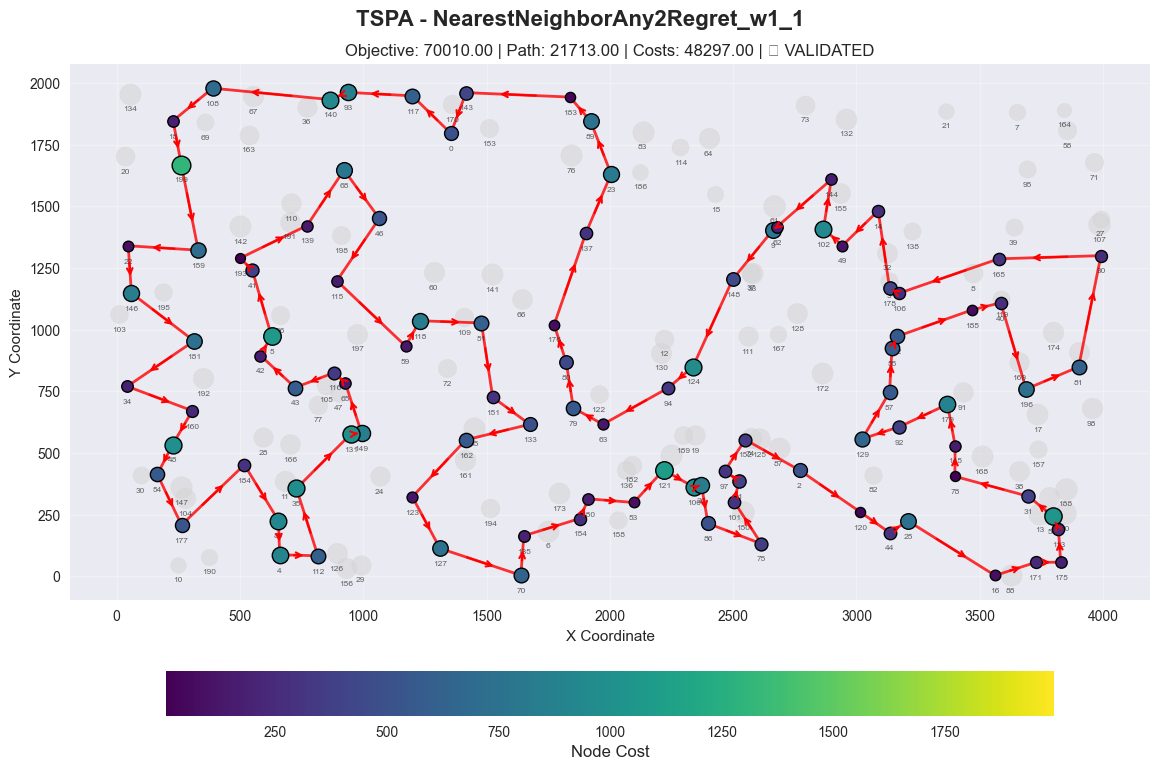


NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 70010.00
Path Length: 21713.00
Node Costs: 48297.00
Selected Nodes: 100

Node Order (Route):
108, 18, 199, 159, 22, 146, 181, 34, 160, 48, 54, 177, 184, 84, 4, 112, 35, 131, 149, 65, 116, 43, 42, 5, 41, 193, 139, 68, 46, 115, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 154, 180, 53, 121, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 129, 57, 55, 52, 185, 40, 196, 81, 90, 165, 106, 178, 14, 49, 102, 144, 62, 9, 148, 124, 94, 63, 79, 80, 176, 137, 23, 89, 183, 143, 0, 117, 93, 140




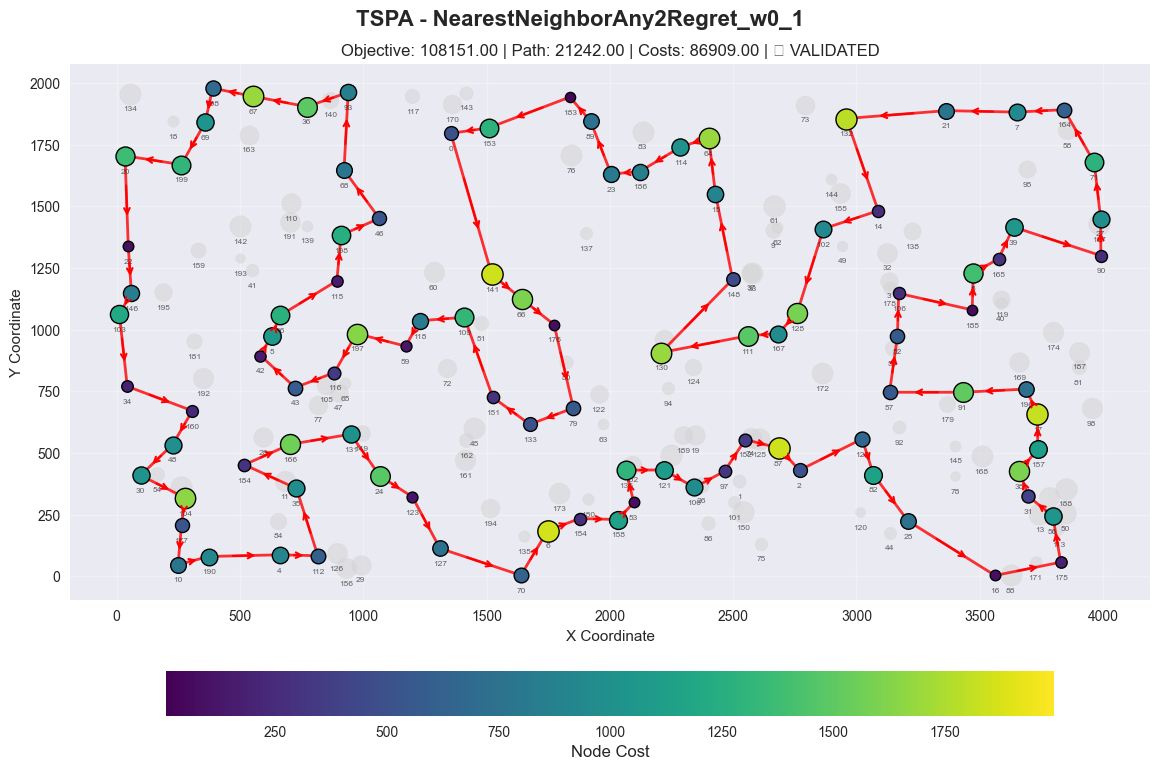


NearestNeighborAny2Regret_w0_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 108151.00
Path Length: 21242.00
Node Costs: 86909.00
Selected Nodes: 100

Node Order (Route):
16, 175, 56, 31, 38, 157, 17, 196, 91, 57, 52, 106, 185, 8, 165, 39, 90, 27, 71, 164, 7, 21, 132, 14, 102, 128, 167, 111, 130, 148, 15, 64, 114, 186, 23, 89, 183, 153, 0, 141, 66, 176, 79, 133, 151, 109, 118, 59, 197, 116, 43, 42, 5, 96, 115, 198, 46, 68, 93, 36, 67, 108, 69, 199, 20, 22, 146, 103, 34, 160, 48, 30, 104, 177, 10, 190, 4, 112, 35, 184, 166, 131, 24, 123, 127, 70, 6, 154, 158, 53, 136, 121, 100, 97, 152, 87, 2, 129, 82, 25




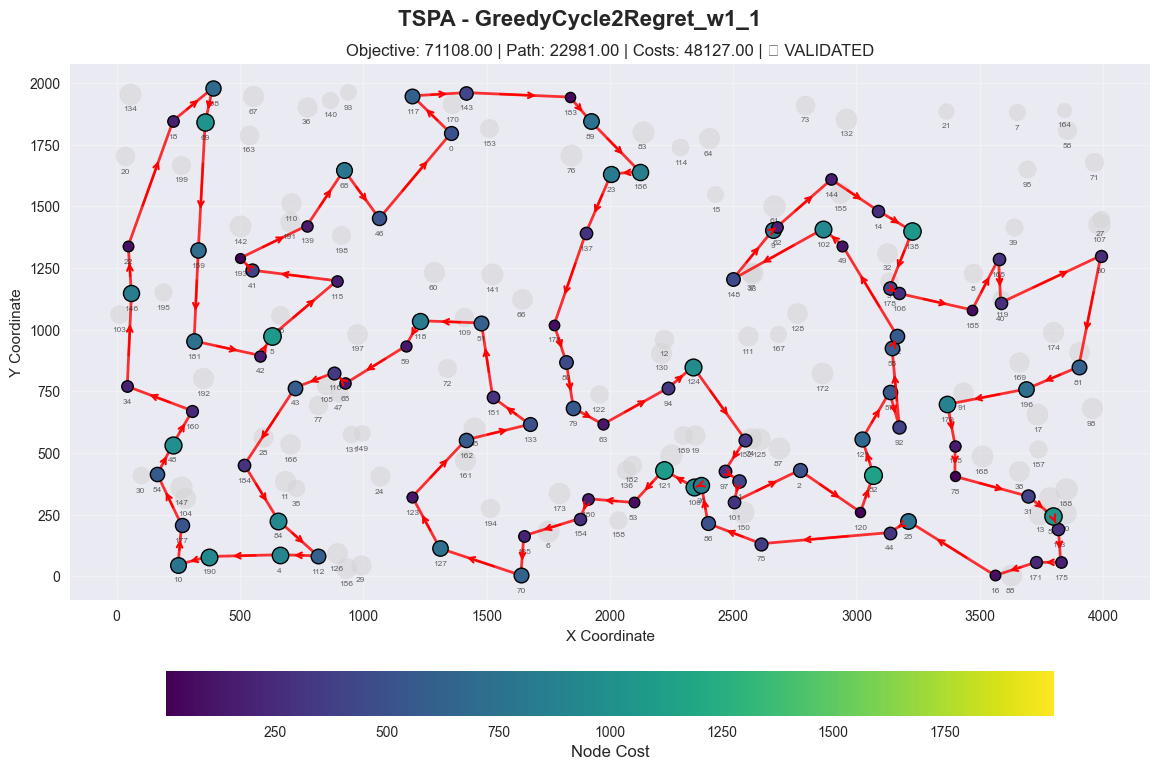


GreedyCycle2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71108.00
Path Length: 22981.00
Node Costs: 48127.00
Selected Nodes: 100

Node Order (Route):
23, 137, 176, 80, 79, 63, 94, 124, 152, 97, 1, 101, 2, 120, 82, 129, 57, 92, 55, 52, 49, 102, 148, 9, 62, 144, 14, 138, 178, 106, 185, 165, 40, 90, 81, 196, 179, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 75, 86, 26, 100, 121, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 65, 116, 43, 184, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 146, 22, 18, 108, 69, 159, 181, 42, 5, 115, 41, 193, 139, 68, 46, 0, 117, 143, 183, 89, 186




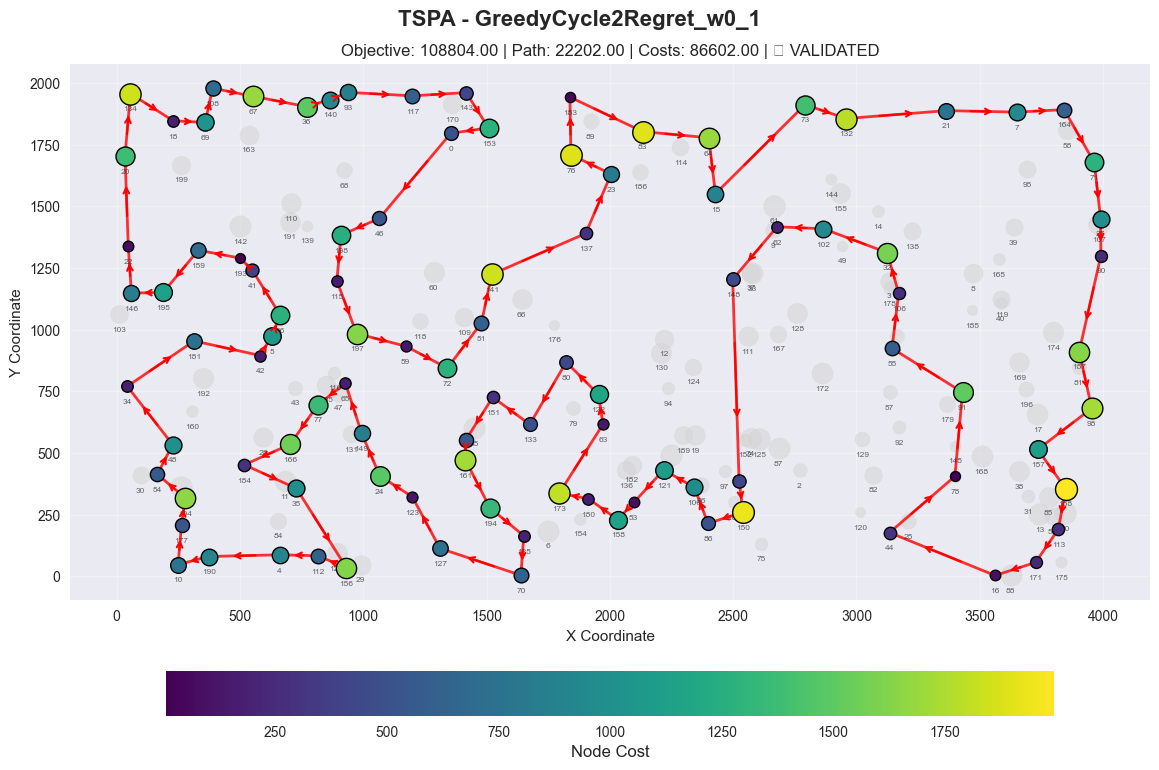


GreedyCycle2Regret_w0_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 108804.00
Path Length: 22202.00
Node Costs: 86602.00
Selected Nodes: 100

Node Order (Route):
148, 1, 150, 86, 100, 121, 53, 158, 180, 173, 63, 122, 80, 133, 151, 162, 161, 194, 135, 70, 127, 123, 24, 149, 65, 77, 166, 184, 35, 156, 112, 4, 190, 10, 177, 104, 54, 48, 34, 181, 42, 5, 96, 41, 193, 159, 195, 146, 22, 20, 134, 18, 69, 108, 67, 36, 140, 93, 117, 143, 153, 0, 46, 198, 115, 197, 59, 72, 51, 141, 137, 23, 76, 183, 83, 64, 15, 73, 132, 21, 7, 164, 71, 27, 90, 187, 98, 157, 188, 113, 171, 16, 44, 78, 91, 55, 106, 32, 102, 62



TSPB - BEST SOLUTIONS



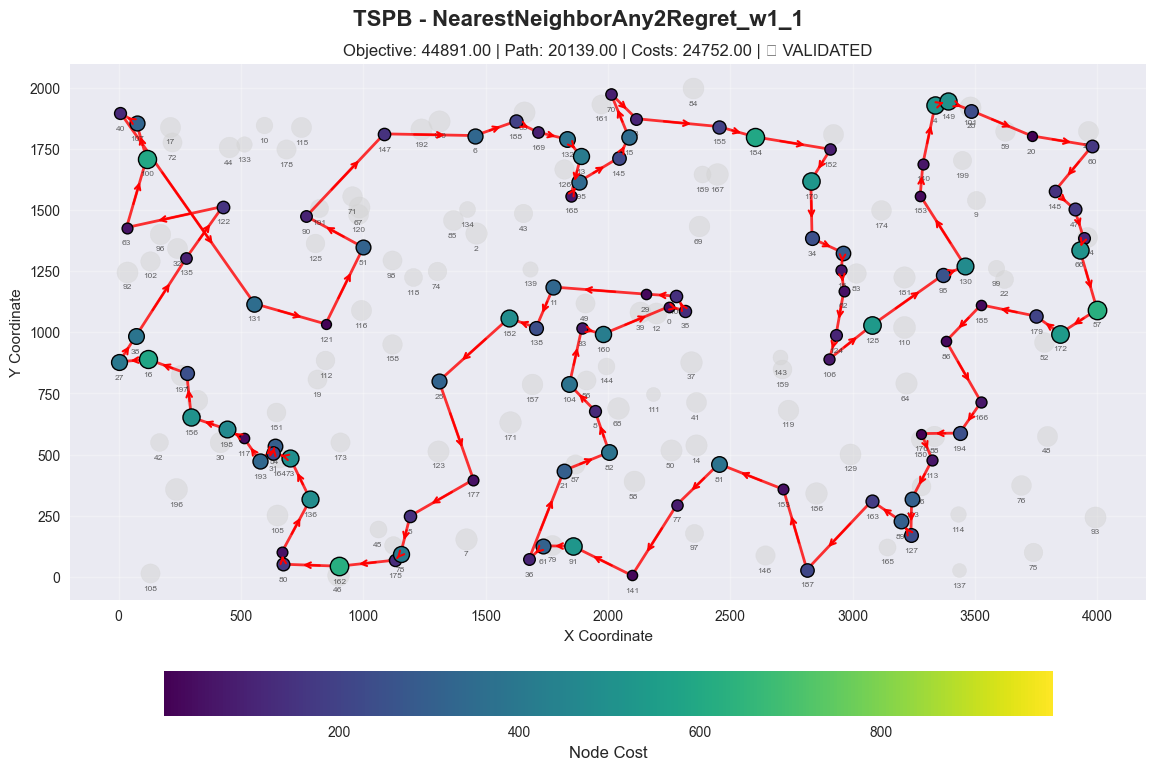


NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44891.00
Path Length: 20139.00
Node Costs: 24752.00
Selected Nodes: 100

Node Order (Route):
131, 121, 51, 90, 147, 6, 188, 169, 132, 13, 168, 195, 145, 15, 70, 3, 155, 184, 152, 170, 34, 55, 18, 62, 124, 106, 128, 95, 130, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 57, 172, 179, 185, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 21, 82, 8, 104, 33, 160, 0, 35, 109, 29, 11, 138, 182, 25, 177, 5, 78, 175, 162, 80, 190, 136, 73, 31, 54, 193, 117, 198, 156, 1, 16, 27, 38, 135, 122, 63, 100, 107, 40




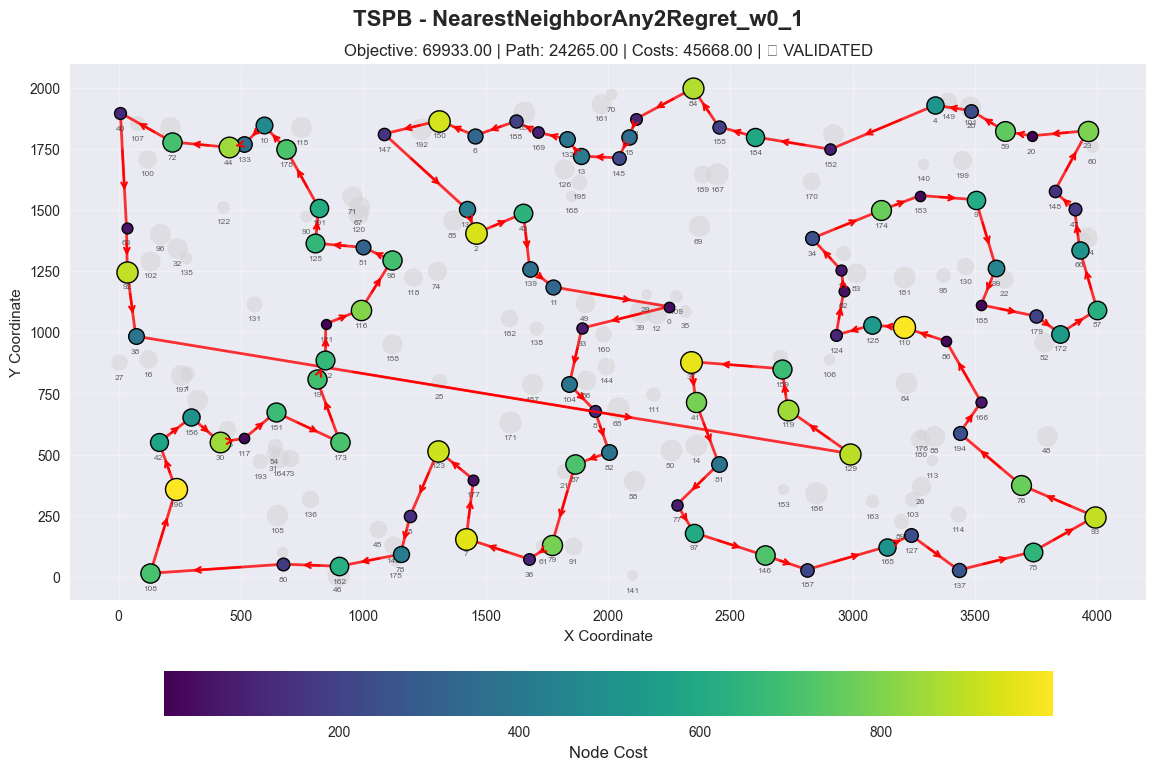


NearestNeighborAny2Regret_w0_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 69933.00
Path Length: 24265.00
Node Costs: 45668.00
Selected Nodes: 100

Node Order (Route):
129, 119, 159, 37, 41, 81, 77, 97, 146, 187, 165, 127, 137, 75, 93, 76, 194, 166, 86, 110, 128, 124, 62, 18, 34, 174, 183, 9, 99, 185, 179, 172, 57, 66, 47, 148, 23, 20, 59, 28, 4, 152, 184, 155, 84, 3, 15, 145, 13, 132, 169, 188, 6, 150, 147, 134, 2, 43, 139, 11, 0, 33, 104, 8, 82, 87, 79, 36, 7, 177, 123, 5, 78, 162, 80, 108, 196, 42, 156, 30, 117, 151, 173, 19, 112, 121, 116, 98, 51, 125, 191, 178, 10, 133, 44, 72, 40, 63, 92, 38




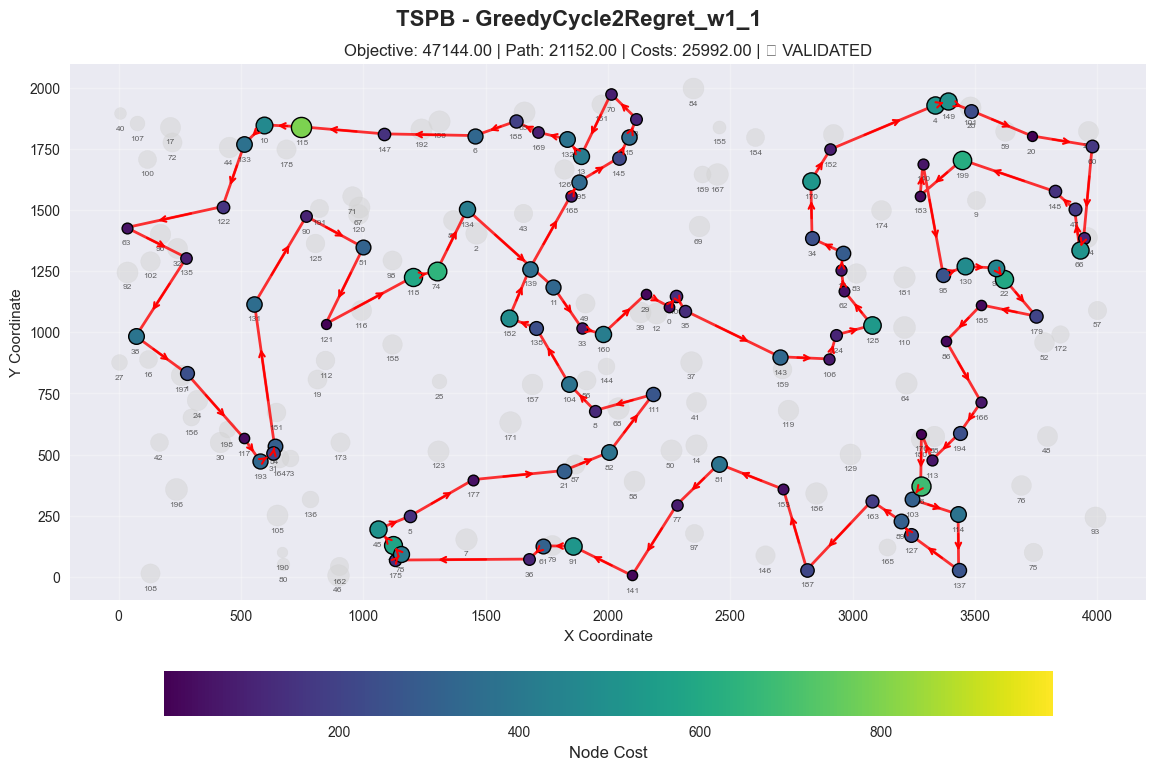


GreedyCycle2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 47144.00
Path Length: 21152.00
Node Costs: 25992.00
Selected Nodes: 100

Node Order (Route):
199, 183, 140, 95, 130, 99, 22, 179, 185, 86, 166, 194, 113, 176, 26, 103, 114, 137, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 175, 78, 142, 45, 5, 177, 21, 82, 111, 8, 104, 138, 182, 139, 168, 195, 145, 15, 3, 70, 13, 132, 169, 188, 6, 147, 115, 10, 133, 122, 63, 135, 38, 1, 117, 193, 31, 54, 131, 90, 51, 121, 118, 74, 134, 11, 33, 160, 29, 0, 109, 35, 143, 106, 124, 128, 62, 18, 55, 34, 170, 152, 4, 149, 28, 20, 60, 94, 66, 47, 148




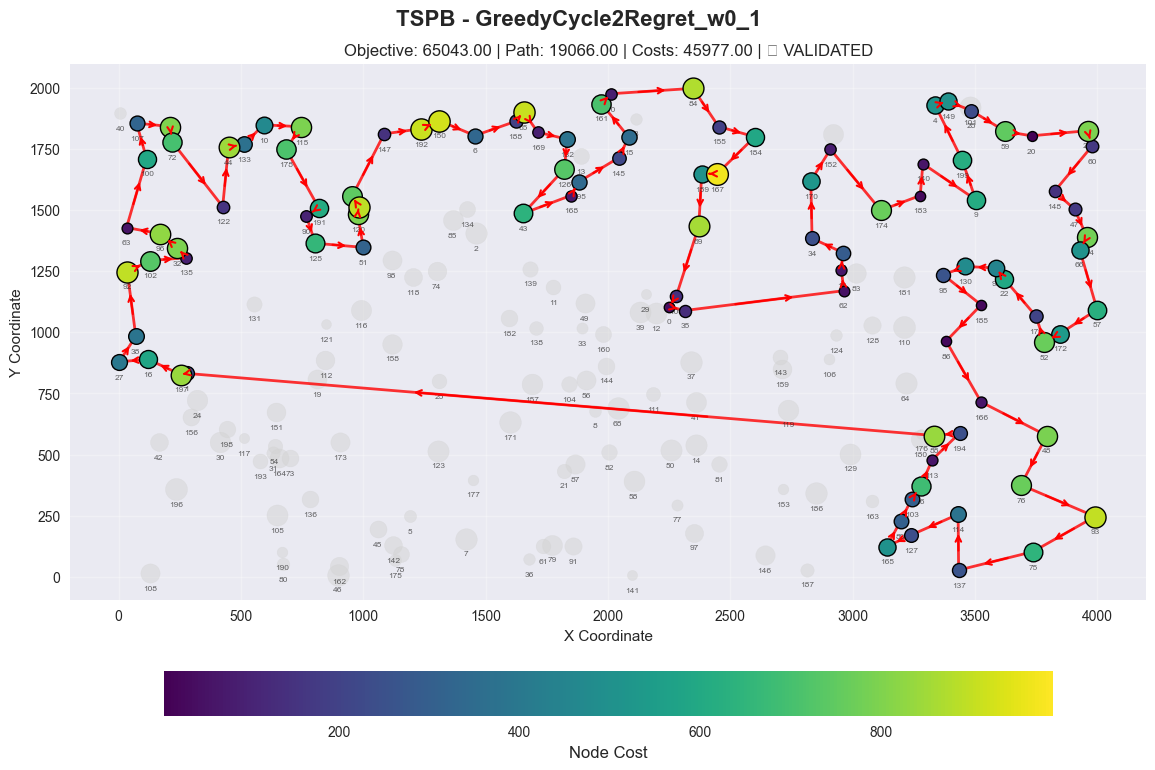


GreedyCycle2Regret_w0_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 65043.00
Path Length: 19066.00
Node Costs: 45977.00
Selected Nodes: 100

Node Order (Route):
88, 1, 197, 16, 27, 38, 92, 102, 135, 32, 96, 63, 100, 107, 17, 72, 122, 44, 133, 10, 115, 178, 191, 90, 125, 51, 120, 67, 71, 147, 192, 150, 6, 188, 65, 169, 132, 126, 43, 168, 195, 145, 15, 161, 70, 84, 155, 184, 167, 189, 69, 109, 0, 35, 62, 18, 55, 34, 170, 152, 174, 183, 140, 9, 199, 4, 149, 28, 59, 20, 23, 60, 148, 47, 154, 66, 57, 172, 52, 179, 22, 99, 130, 95, 185, 86, 166, 48, 76, 93, 75, 137, 114, 127, 165, 89, 103, 26, 113, 194




In [15]:
# Plot best solutions using utility function
plot_best_solutions(algorithm_data)

## Algorithm Performance Comparison

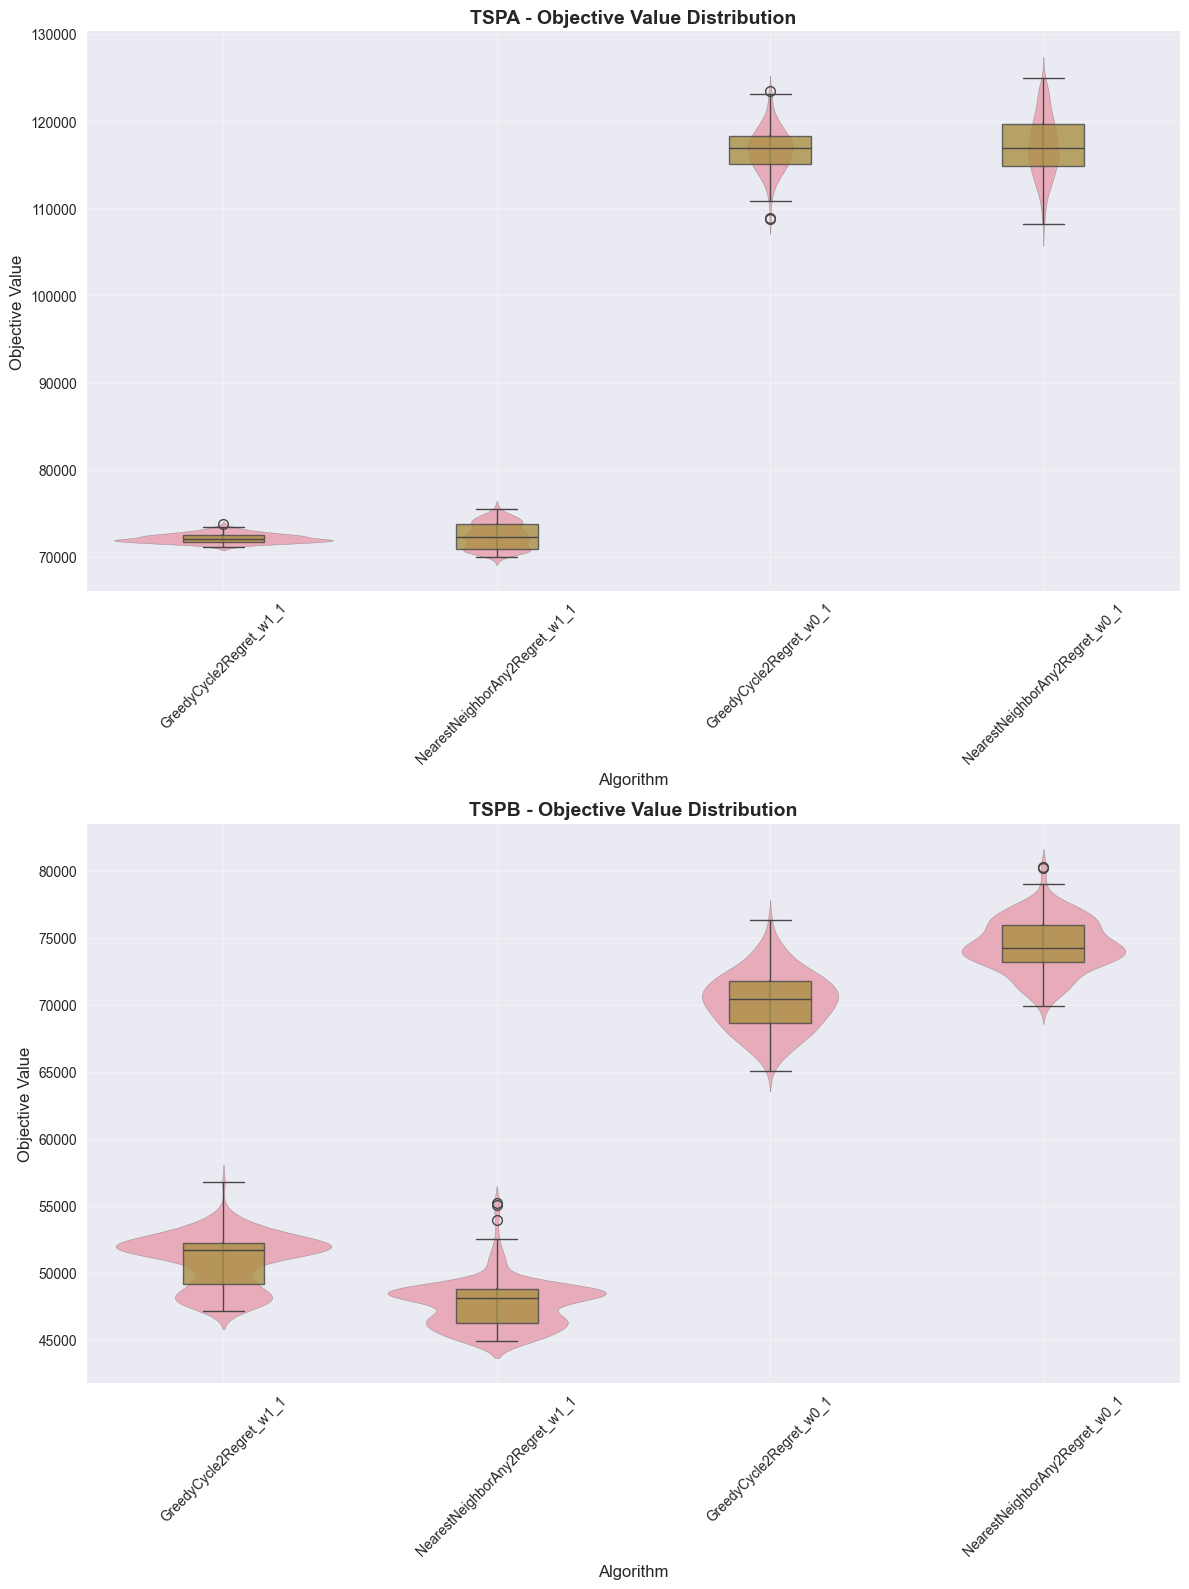

In [16]:
# Performance comparison plots using utility functions
plot_objective_distributions(algorithm_data)